In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
#matplotlib 패키지 한글 깨짐 처리 시작
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [4]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [5]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/100000
data.rename(columns={'매출금액' : '매출금액(단위:십만원)'}, inplace=True)

In [6]:
data_f = data[data['품목대분류명'] == '식품']
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
grouped_C

,매출건수
기준년월,
201903,475335
201909,379678
202003,613956
202009,749066
202103,686292


In [7]:
grouped_M = pd.DataFrame(data_f['매출금액(단위:십만원)'].groupby(data_f['기준년월']).sum())
grouped_M

,매출금액(단위:십만원)
기준년월,
201903,162485.04474
201909,137629.70433
202003,210014.15140
202009,290701.21990
202103,229093.43697


In [8]:
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월');df_f

,매출금액(단위:십만원),매출건수
기준년월,,
201903,162485.04474,475335
201909,137629.70433,379678
202003,210014.15140,613956
202009,290701.21990,749066
202103,229093.43697,686292


In [9]:
#rng : 먼저 기간 만들어주기
rng = pd.date_range('2019.03', periods=5, freq='6M')
rng

DatetimeIndex(['2019-03-31', '2019-09-30', '2020-03-31', '2020-09-30',
               '2021-03-31'],
              dtype='datetime64[ns]', freq='6M')

In [10]:
#일일히 값 지정해줌.
df_f.set_index(rng, inplace= True)

In [12]:
df_f_upsample = df_f.resample('M').mean()

In [13]:
#(1-1) 앞의 값으로 뒤의 결측값 채우기 (선형회귀로 값 채우기)
# (1) 선형회귀로 값 채우기

df_f_upsample=df_f_upsample.interpolate(method='values')
df_f_upsample=df_f_upsample.reset_index().rename(columns={"index":"기준년월"})


In [14]:
#일수 제거
df_f_upsample["기준년월"] = df_f_upsample["기준년월"].astype(str).str[:-3]

<AxesSubplot:>

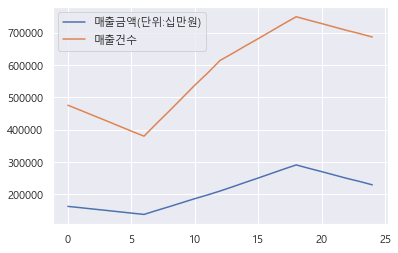

In [15]:
df_f_upsample.interpolate(method='values').plot()

In [ ]:
df_f_upsample

<AxesSubplot:xlabel='기준년월', ylabel='매출건수'>

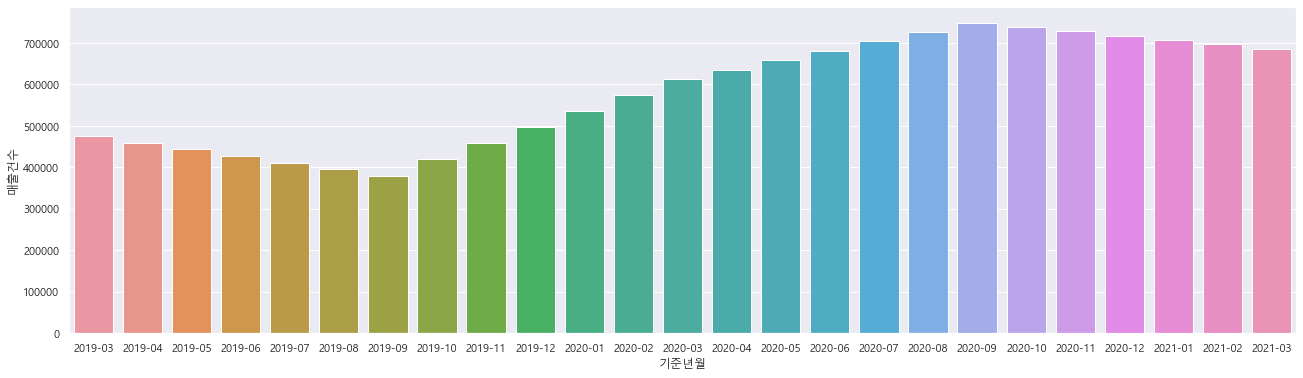

In [16]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.barplot(x = '기준년월', y = '매출건수', data = df_f_upsample)

<AxesSubplot:xlabel='기준년월', ylabel='매출금액(단위:십만원)'>

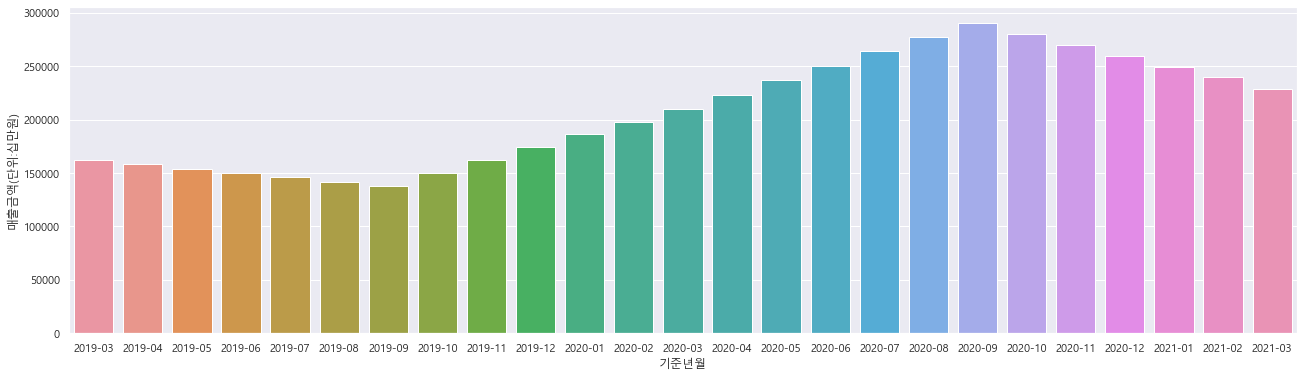

In [17]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.barplot(x = '기준년월', y = '매출금액(단위:십만원)', data = df_f_upsample)